In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sbn

#used to check for stationarity in the time series
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import linregress

In [12]:
def check_stationarity(series, alpha, diff):

    # h_0 is that the series has a unit root-> if so, likely non-stationarity
    result_adf = adfuller(series)
    p_val = result_adf[1]
    if p_val < alpha:
        # reject, likely stationary
        print("ADF test: p-val=", p_val, "-> Conclusion: likely stationary")
    else:
        print("ADF test: p-val=", p_val, "-> Conclusion: likely has a trend")

    # print("----------------------------------------------------------------")

    # result_kpss = kpss(diff)
    # p_val = result_kpss[1]
    # if p_val > alpha:
    #     # reject, likely stationary
    #     print("KPSS test: p-val=", p_val, "-> Conclusion: likely stationary")
    # else:
    #     print("KPSS test: p-val=", p_val, "-> Conclusion: likely has a trend")

    return result_adf[1]

In [13]:
def methodology(stk1, stk2):
    diff = stk1["Adj Close"] - stk2["Adj Close"]

    time = np.arange(len(diff))
    reg = linregress(time, diff)
    line = reg.intercept + reg.slope*time
    new_series = diff - line

    return check_stationarity(new_series, 0.05, diff)

In [14]:
def download_data(stk):

    # start date because of moderna listing in 2018 December and yfinance data delay

    start_date = "2019-01-01"
    end_date = "2023-01-01"

    stk_data = yf.download(stk,start=start_date,end=end_date)

    return stk_data

In [15]:
# Will plot 2 things

# universe = ["MSFT", "MRNA",]

# stk_data = []
# for stk in universe:
#     stk_data.append(download_data(stk))

# plt.figure()
# for x in stk_data:
#     plt.plot(x["Adj Close"], label="stk1")

# plt.legend()
# plt.title("stks Price Plot")
# plt.show()

In [16]:
# Obtain Data
universe = ["AAPL","AAL","AMD","AMGN","AMZN","BA","BABA","BAC","C","CAT","COST","CSCO","CVX","DIS","DLR","EQIX","F","GM","GOOGL","GS","IBM","INTC","JNJ","JPM","KO","LMT","LULU","META","MPC","MRK","MRNA","MSFT","MU","NFLX","NKE","NVDA","PFE","TSLA","VZ","WFC","WM","XOM","SCHW","RIOT",]

stk_data = []
for stk in universe:
    stk_data.append(download_data(stk))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

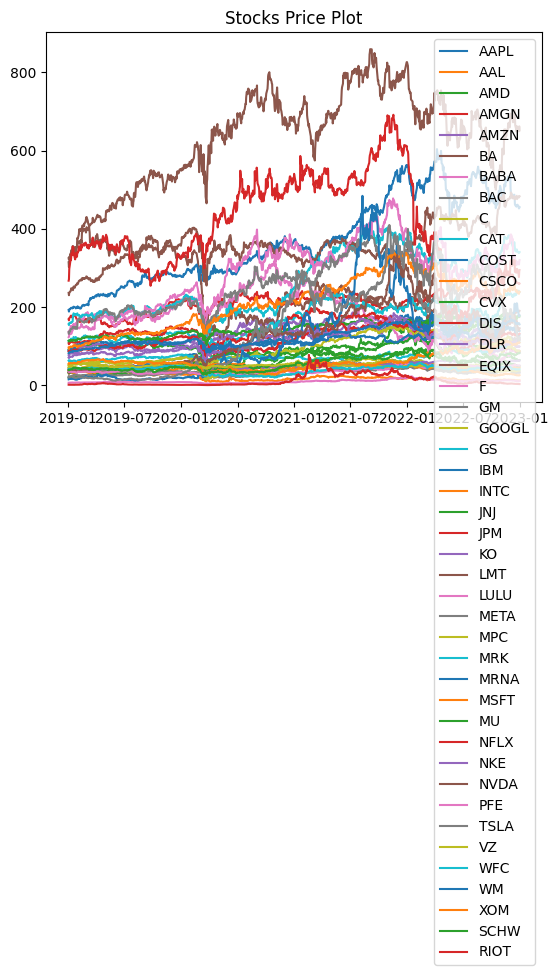

In [17]:
plt.figure()
i = 0
for x in stk_data:
    plt.plot(x["Adj Close"], label=universe[i])
    i+=1

plt.legend()
plt.title("Stocks Price Plot")
plt.savefig('Stock Prices.png', dpi = 1500)
plt.show()

In [18]:
# initialize cov-matrix
data = np.random.rand(len(universe), len(universe))
stockNum = len(universe)

# Calculate the stationary properties
cov = np.zeros((stockNum, stockNum))
for i in range(stockNum):
    for j in range(stockNum):
        if (i == j):
            data[i,j] = 1
        else:
            print(universe[i]+universe[j])
            
            data[i,j] = methodology(stk_data[i],stk_data[j])

AAPLAAL
ADF test: p-val= 0.6708073933605752 -> Conclusion: likely has a trend
AAPLAMD
ADF test: p-val= 0.00547028295423143 -> Conclusion: likely stationary
AAPLAMGN
ADF test: p-val= 0.45761417766740237 -> Conclusion: likely has a trend
AAPLAMZN
ADF test: p-val= 0.29317007934541206 -> Conclusion: likely has a trend
AAPLBA
ADF test: p-val= 0.43427937092535257 -> Conclusion: likely has a trend
AAPLBABA
ADF test: p-val= 0.1916164606546522 -> Conclusion: likely has a trend
AAPLBAC
ADF test: p-val= 0.4415495104344106 -> Conclusion: likely has a trend
AAPLC
ADF test: p-val= 0.4212605140581039 -> Conclusion: likely has a trend
AAPLCAT
ADF test: p-val= 0.29748893125525677 -> Conclusion: likely has a trend
AAPLCOST
ADF test: p-val= 0.028197948602225638 -> Conclusion: likely stationary
AAPLCSCO
ADF test: p-val= 0.6764109057568315 -> Conclusion: likely has a trend
AAPLCVX
ADF test: p-val= 0.8975491697300215 -> Conclusion: likely has a trend
AAPLDIS
ADF test: p-val= 0.250065711771001 -> Conclusion:

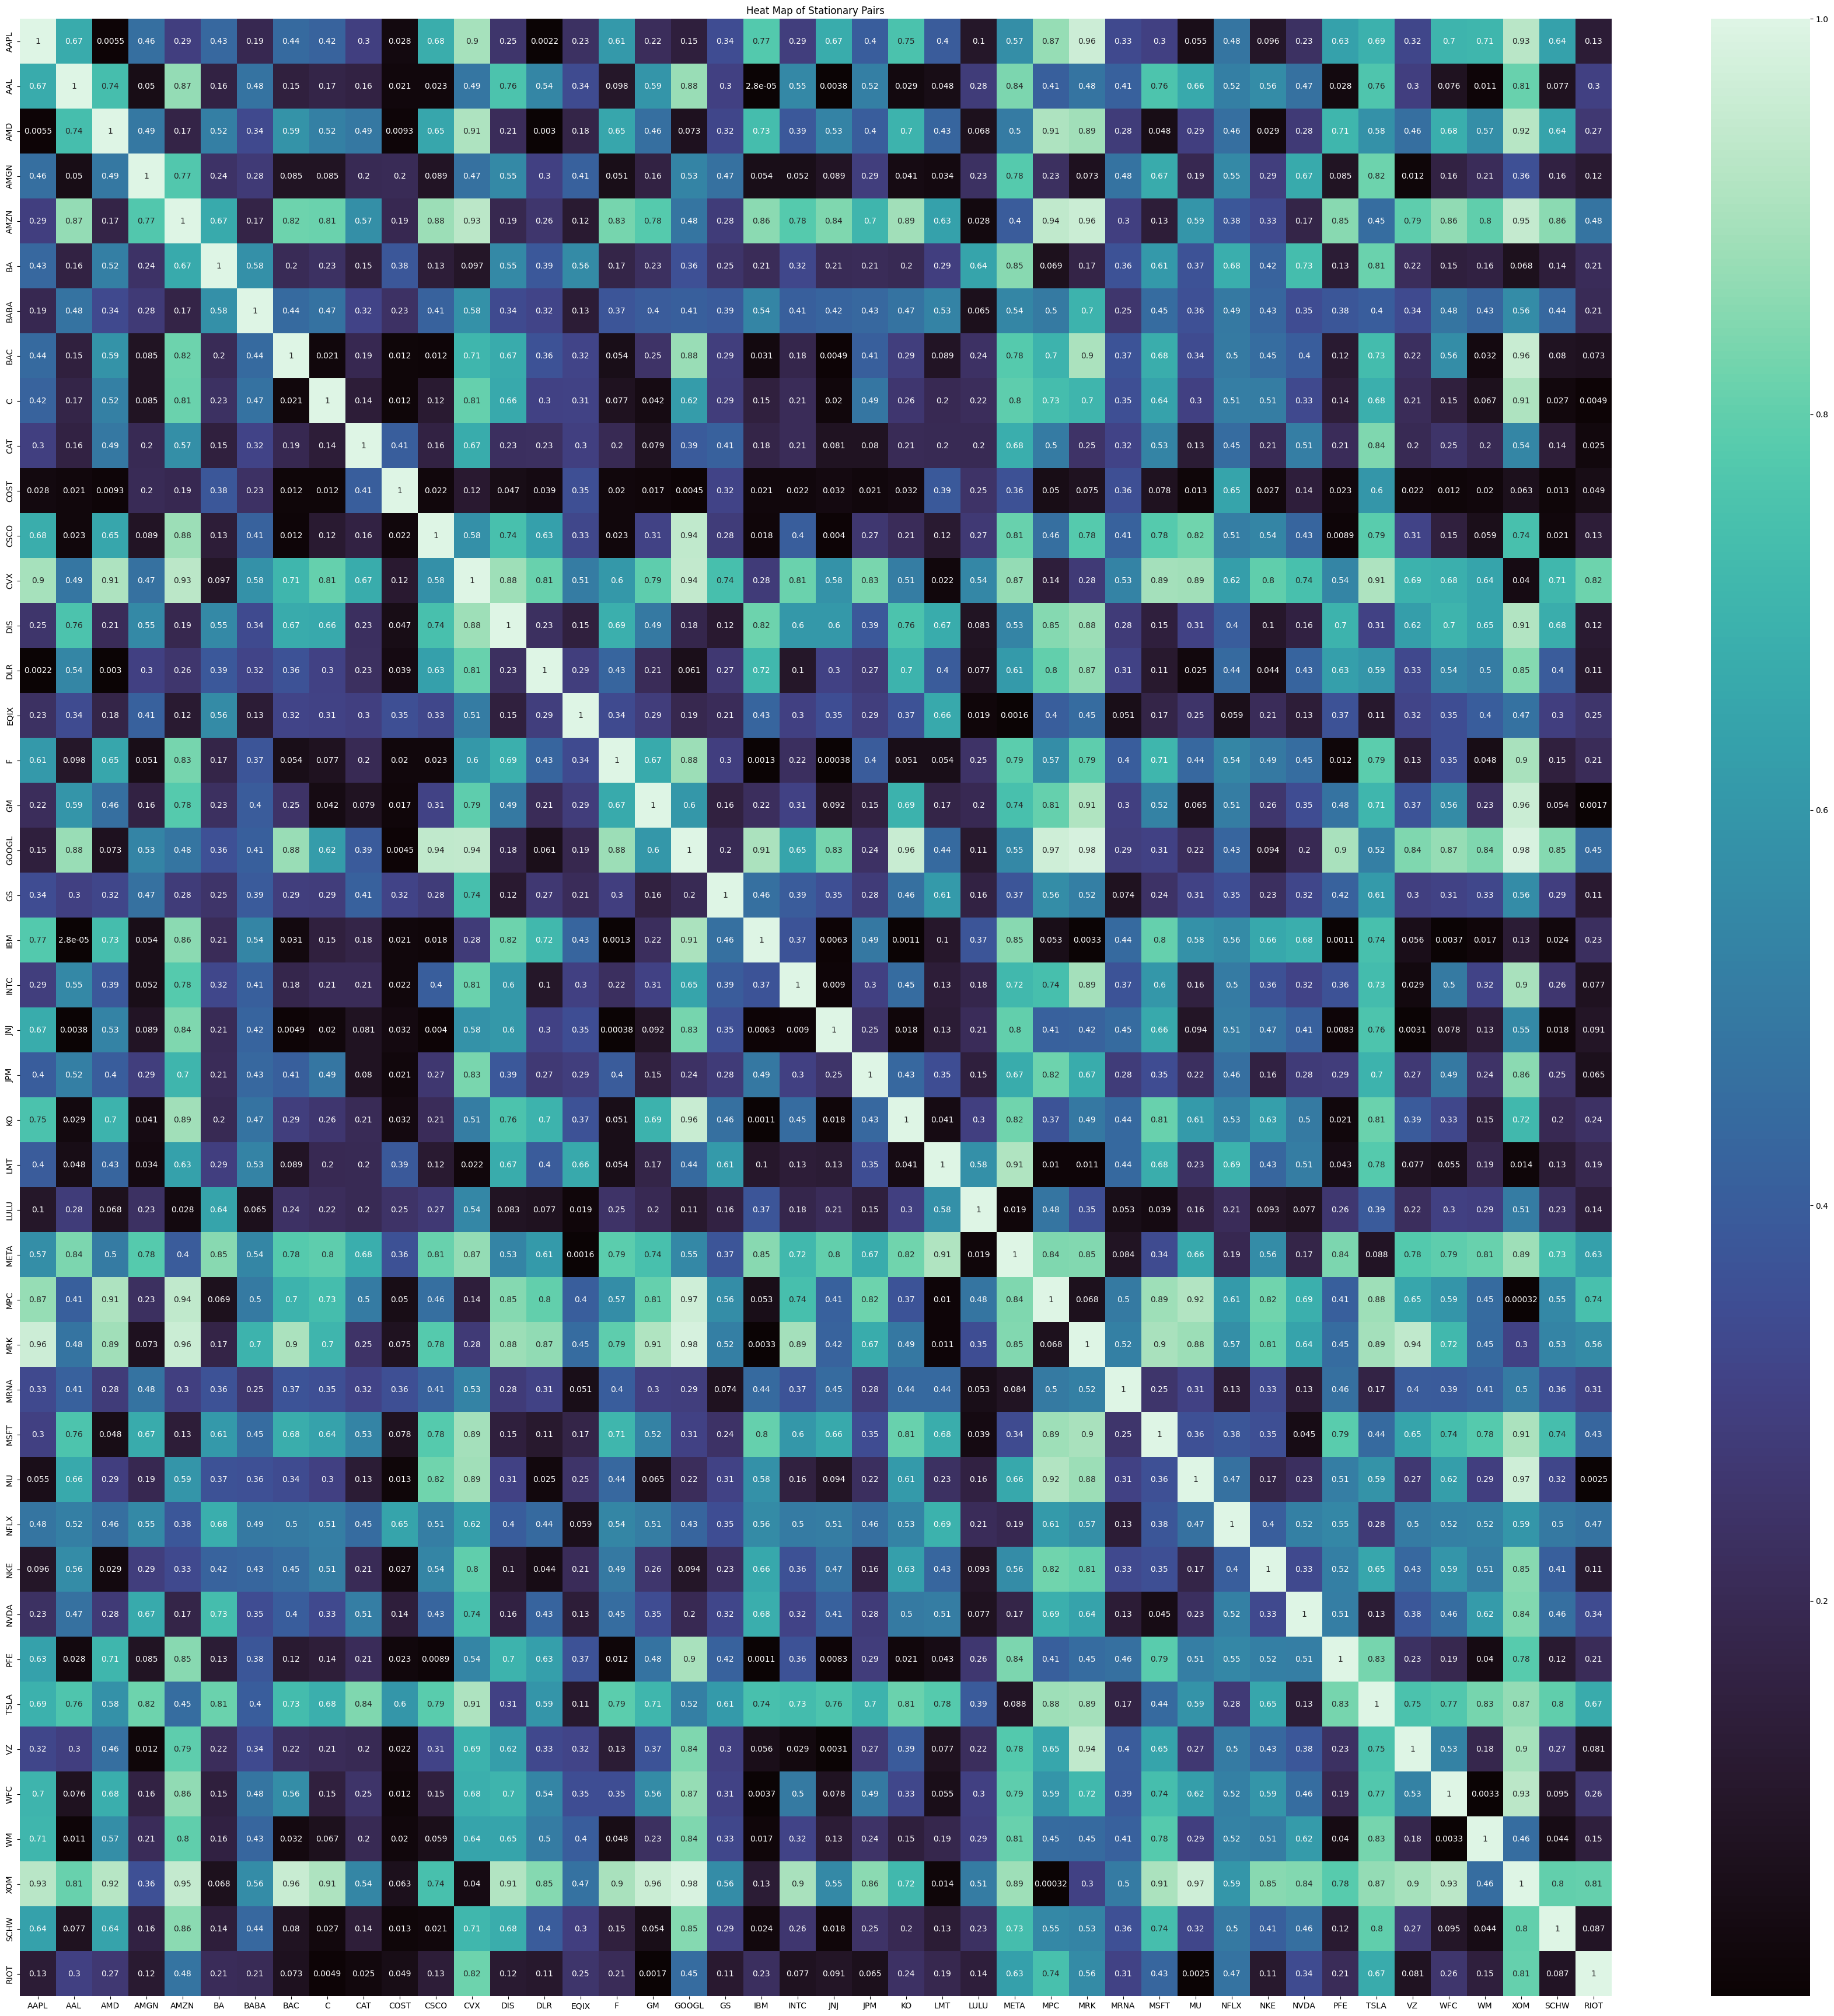

<Figure size 7680x5760 with 0 Axes>

In [19]:
# Create a heatmap using Matplotlib
plt.figure(figsize=(stockNum, stockNum))
heat_map = sbn.heatmap(data, xticklabels=universe, yticklabels=universe, annot=True, cmap="mako")
plt.title("Heat Map of Stationary Pairs")
plt.figure(dpi=1200)
plt.show()

In [20]:
data

array([[1.        , 0.67080739, 0.00547028, ..., 0.92762758, 0.63579293,
        0.13275675],
       [0.67080739, 1.        , 0.73606329, ..., 0.80864478, 0.07732308,
        0.30406898],
       [0.00547028, 0.73606329, 1.        , ..., 0.92284157, 0.64431713,
        0.26918056],
       ...,
       [0.92762758, 0.80864478, 0.92284157, ..., 1.        , 0.80161454,
        0.80807561],
       [0.63579293, 0.07732308, 0.64431713, ..., 0.80161454, 1.        ,
        0.0873428 ],
       [0.13275675, 0.30406898, 0.26918056, ..., 0.80807561, 0.0873428 ,
        1.        ]])

In [21]:
df = pd.DataFrame(data = data)
df.columns = universe

print("Data Frame")
print(df)
print()

# Get data below diagonal and sort
sol = (df.where(np.triu(np.ones(df.shape), k=1).astype(bool)).stack().sort_values(ascending=False).reset_index())

# Dict comprehension
mapping = {i: universe[i] for i in range(len(universe))}

# Replace numbers in column 'A' with the corresponding index string
sol['level_0'] = sol['level_0'].map(mapping)

Data Frame
        AAPL       AAL       AMD      AMGN      AMZN        BA      BABA   
0   1.000000  0.670807  0.005470  0.457614  0.293170  0.434279  0.191616  \
1   0.670807  1.000000  0.736063  0.049524  0.869426  0.161283  0.475252   
2   0.005470  0.736063  1.000000  0.489934  0.170024  0.518994  0.335757   
3   0.457614  0.049524  0.489934  1.000000  0.773044  0.240088  0.276014   
4   0.293170  0.869426  0.170024  0.773044  1.000000  0.665372  0.170539   
5   0.434279  0.161283  0.518994  0.240088  0.665372  1.000000  0.577225   
6   0.191616  0.475252  0.335757  0.276014  0.170539  0.577225  1.000000   
7   0.441550  0.151790  0.588367  0.085310  0.820065  0.203561  0.444913   
8   0.421261  0.172412  0.522979  0.084931  0.814925  0.233672  0.471879   
9   0.297489  0.162110  0.491283  0.202570  0.571461  0.149998  0.315280   
10  0.028198  0.021190  0.009274  0.203946  0.193619  0.379131  0.234918   
11  0.676411  0.022629  0.654871  0.089278  0.881295  0.132947  0.414938   
1

In [22]:
print(sol)
print()
n = 20
print(f"last {n} rows")
print()
print(sol.tail(n))

    level_0 level_1         0
0     GOOGL     XOM  0.984566
1     GOOGL     MRK  0.981332
2        MU     XOM  0.968100
3     GOOGL     MPC  0.965191
4      AAPL     MRK  0.963464
..      ...     ...       ...
941     IBM      KO  0.001116
942     IBM     PFE  0.001058
943       F     JNJ  0.000384
944     MPC     XOM  0.000324
945     AAL     IBM  0.000028

[946 rows x 3 columns]

last 20 rows

    level_0 level_1         0
926       C    RIOT  0.004922
927     BAC     JNJ  0.004863
928    COST   GOOGL  0.004468
929    CSCO     JNJ  0.004036
930     AAL     JNJ  0.003754
931     IBM     WFC  0.003668
932     WFC      WM  0.003308
933     IBM     MRK  0.003259
934     JNJ      VZ  0.003063
935     AMD     DLR  0.002968
936      MU    RIOT  0.002508
937    AAPL     DLR  0.002185
938      GM    RIOT  0.001720
939    EQIX    META  0.001554
940       F     IBM  0.001344
941     IBM      KO  0.001116
942     IBM     PFE  0.001058
943       F     JNJ  0.000384
944     MPC     XOM  0.000324
9